In [5]:
'''
ASTP-720, Fall 2020
Homework 3
Zach Diermyer
Problem 1
'''

import numpy as np
import unittest

class matrix:
    def __init__(self, data):
        #Creates Matrix object with 2D data array
        self.data = data
        
    def __add__(self, addme):
        '''
        Adds 2 matrix objects together
        Inputs:
            self - First matrix being summed
            addme - Matrix being added to first
        Returns:
            newmat - Matrix sum of inputs
        '''
        newmat = []
        for i in range(0, len(self.data)):
            newmat.append([])
            if i > len(addme.data):
                addme.data.append([])
            for j in range(0, len(self.data[i])):
                if j > len(addme.data[i]):
                    addme.data[i].append(0)
                el = self.data[i][j] + addme.data[i][j]
                newmat[i].append(el)
        return(newmat)
    
    def __mult__(self, multer):
        '''
        Multiplies 2 matrix objects together
        Inputs:
            self - The first matrix being multiplied, matrices must be in order
            addme - The second matrix being multiplied
        Returns:
            newmat - Matrix product of inputs
        '''
        newmat = []
        primary = self.data
        secondary = multer.data
        if len(primary[0]) != len(secondary):
            raise ValueError('Cannot multiply these matrices')
        for k in range(0, len(primary)):
            newmat.append([])
            for i in range(0, len(primary)):
                el = 0
                for j in range(0, len(primary[i])):
                    el += primary[k][j]*secondary[j][i]
                newmat[k].append(el)
        return(newmat)
    
    def transpose(self):
        '''
        Takes the transpose of a matrix
        Inputs:
            self - The matrix to find the transpose of
        Returns:
            newmat - Transposed matrix
        '''
        newmat = []
        for i in range(0, len(self.data[0])):
            newmat.append([])
        for i in range(0, len(self.data)):
            for j in range(0, len(self.data[i])):
                newmat[j].append(self.data[i][j])
        return(newmat)
    
    def invert(self):
        '''
        Creates the inverse to any size matrix
        Inputs:
            self - The matrix to find the inverse of
        Returns:
            1/det - Multiplicative inverse of the determinant
            final - Cofactor matrix, when multiplied by 1/det this is the inverse
        '''
        if self.determ == 0:
            raise ValueError('Not an Invertable Matrix')
        if len(self.data) == 2:
            return(self.invert2x2())
        else:
            det = self.determ()
            tmatrix = matrix(self.transpose())
            final = []
            for i in range(0, len(tmatrix.data)):
                finalrow = []
                for j in range(0, len(tmatrix.data[i])):
                    newmat = []
                    for k in range(0, len(tmatrix.data)):
                        if k == i:
                            pass
                        else:
                            newrow = tmatrix.data[k][0:j] + tmatrix.data[k][j+1:]
                            newmat.append(newrow)
                    newmatrix = matrix(data = newmat)
                    if len(newmat) == 2:
                        finalrow.append(((-1)**(j+i+2))*newmatrix.determ2x2())
                    else:
                        finalrow.append(((-1)**(j+i+2))*newmatrix.determ())
                final.append(finalrow)
            return((1/det), final)
    
    def invert2x2(self):
        #Inverts a 2x2 matrix
        coeff = self.determ2x2()
        switch = [[self.data[1][1], -self.data[0][1]], [-self.data[1][0], self.data[0][0]]]
        return(1/coeff, switch)
    
    def trace(self):
        '''
        Takes the trace of a matrix
        Inputs:
            self - The matrix to find the trace of
        Returns:
            tot - Trace of matrix
        '''
        if len(self.data) != len(self.data[0]):
            raise ValueError('Must be square matrix')
        tot = 0
        for i in range(0, len(self.data)):
            tot += self.data[i][i]
        return(tot)
    
    def determ(self):
        '''
        Recursively finds the determinant of any size matrix
        Inputs:
            self - The matrix to find the inverse of
        Returns:
            tot - The resulting determinant
        '''
        if len(self.data) != len(self.data[0]):
            raise ValueError('Must be square matrix')
        if len(self.data) == 2:
            return(self.determ2x2())
        else:
            tot = 0
            for i in range(0, len(self.data[0])):
                newmat = []
                for j in range(1, len(self.data)):
                    newrow = self.data[j][0:i] + self.data[j][i+1:]
                    newmat.append(newrow)
                newmatrix = matrix(data = newmat)
                if len(newmat) == 2:
                    tot += ((-1)**(i+2))*self.data[0][i]*newmatrix.determ2x2()
                else:
                    tot += ((-1)**(i+2))*self.data[0][i]*newmatrix.determ()
            return(tot)
                    
    def determ2x2(self):
        #Finds 2x2 matrix determinant
        return((self.data[0][0]*self.data[1][1])-(self.data[0][1]*self.data[1][0]))
    
    def LUdecomp(self):
        '''
        Performs an LU decomposition of ay size square matrix
        Inputs:
            self - The matrix to perform the decomposition on
        Returns:
            lower - The lower triangular matrix decomposition
            upper - The upper triangular matrix decomposition
        '''
        lower = []                         #Initialize lower triangular matrix
        for i in range(0, len(self.data)):
            newrow = []
            for j in range(0, len(self.data)):
                newrow.append(0)
            lower.append(newrow)
        upper = []                         #Initialize upper triangular matrix
        for i in range(0, len(self.data)):
            newrow = []
            for j in range(0, len(self.data)):
                newrow.append(0)
            upper.append(newrow)
        for i in range(0, len(self.data)): 
            for k in range(i, len(self.data)):
                tot = 0
                for j in range(i): 
                    tot += (lower[i][j] * upper[j][k])
                upper[i][k] = self.data[i][k] - tot
            for k in range(i, len(self.data)):
                if i == k: 
                    lower[i][i] = 1 # Diagonal values are 1 
                else: 
                    tot = 0 
                    for j in range(i): 
                        tot += (lower[k][j] * upper[j][i])
                    lower[k][i] = int((self.data[k][i] - tot)/upper[i][i])
        return(lower, upper)
    
def main():
    m1 = matrix([[7,4], [9,6]])
    m2 = matrix([[8,0], [4,1]])
    m3 = matrix([[5,2,7], [3,1,8]])
    m4 = matrix([[2,6], [4,0], [1,3]])
    m5 = matrix([[1,2,3], [5,1,4], [0,2,5]])
    m6 = matrix([[1,2,3,4], [1,0,3,4], [1,2,6,4], [1,2,3,8]])
    m7 = matrix([[2, -1, -2], [-4, 6, 3], [-4, -2, 8]])
    print('Adding Matrices: ' + str(m1.data) + ' & ' + str(m2.data))
    added = m1.__add__(addme = m2)
    print('Sum: ' + str(added))
    assert added == [[15, 4], [13, 7]]
    print('Multiplying Matrices: ' + str(m3.data) + ' & ' + str(m4.data))
    multiplied = m3.__mult__(multer = m4)
    print('Product: ' + str(multiplied))
    assert multiplied == [[25, 51], [18, 42]]
    print('Transposing Matrix : ' + str(m4.data))
    transpose = m4.transpose()
    print('Transpose: ' + str(transpose))
    assert transpose == [[2, 4, 1], [6, 0, 3]]
    print('Finding Trace of: ' + str(m5.data))
    tra = m5.trace()
    print('Trace = ' + str(tra))
    assert tra == 7
    print('Finding Determinant of: ' + str(m6.data))
    det = m6.determ()
    print('Determinant = ' + str(det))
    assert det == -24
    print('Inverting: ' + str(m5.data))
    inv = m5.invert()
    print('Result = ' + str(inv[0]) + '*' + str(inv[1]))
    assert inv[0] == -0.043478260869565216
    assert inv[1] == [[-3, -4, 5], [-25, 5, 11], [10, -2, -9]]
    print('Taking LU Decomposition of ' + str(m7.data))
    lu = m7.LUdecomp()
    print('L = ' + str(lu[0]) + ', U = ' + str(lu[1]))
    assert lu[0] == [[1, 0, 0], [-2, 1, 0], [-2, -1, 1]]
    assert lu[1] == [[2, -1, -2], [0, 4, -1], [0, 0, 3]]
main()

Adding Matrices: [[7, 4], [9, 6]] & [[8, 0], [4, 1]]
Sum: [[15, 4], [13, 7]]
Multiplying Matrices: [[5, 2, 7], [3, 1, 8]] & [[2, 6], [4, 0], [1, 3]]
Product: [[25, 51], [18, 42]]
Transposing Matrix : [[2, 6], [4, 0], [1, 3]]
Transpose: [[2, 4, 1], [6, 0, 3]]
Finding Trace of: [[1, 2, 3], [5, 1, 4], [0, 2, 5]]
Trace = 7
Finding Determinant of: [[1, 2, 3, 4], [1, 0, 3, 4], [1, 2, 6, 4], [1, 2, 3, 8]]
Determinant = -24
Inverting: [[1, 2, 3], [5, 1, 4], [0, 2, 5]]
Result = -0.043478260869565216*[[-3, -4, 5], [-25, 5, 11], [10, -2, -9]]
Taking LU Decomposition of [[2, -1, -2], [-4, 6, 3], [-4, -2, 8]]
L = [[1, 0, 0], [-2, 1, 0], [-2, -1, 1]], U = [[2, -1, -2], [0, 4, -1], [0, 0, 3]]


{(1, 2): <Quantity 4.6966948e+08 1 / s>, (1, 3): <Quantity 55727384. 1 / s>, (2, 3): <Quantity 44082910. 1 / s>, (1, 4): <Quantity 12779603. 1 / s>, (2, 4): <Quantity 8415716.8 1 / s>, (3, 4): <Quantity 8982279.4 1 / s>, (1, 5): <Quantity 4123298.6 1 / s>, (2, 5): <Quantity 2529347.7 1 / s>, (3, 5): <Quantity 2199822.5 1 / s>, (4, 5): <Quantity 2698131.7 1 / s>, (1, 6): <Quantity 1643335. 1 / s>, (2, 6): <Quantity 972780.3 1 / s>, (3, 6): <Quantity 777957.7 1 / s>, (4, 6): <Quantity 770776.7 1 / s>, (5, 6): <Quantity 1024968.5 1 / s>, (1, 7): <Quantity 756531.5 1 / s>, (2, 7): <Quantity 438702.2 1 / s>, (3, 7): <Quantity 335709.1 1 / s>, (4, 7): <Quantity 304017.9 1 / s>, (5, 7): <Quantity 325139.5 1 / s>, (6, 7): <Quantity 455884.8 1 / s>, (1, 8): <Quantity 386782.9 1 / s>, (2, 8): <Quantity 221385.8 1 / s>, (3, 8): <Quantity 164993. 1 / s>, (4, 8): <Quantity 142361. 1 / s>, (5, 8): <Quantity 138712.5 1 / s>, (6, 8): <Quantity 156025.1 1 / s>, (7, 8): <Quantity 227108.5 1 / s>, (1, 9)

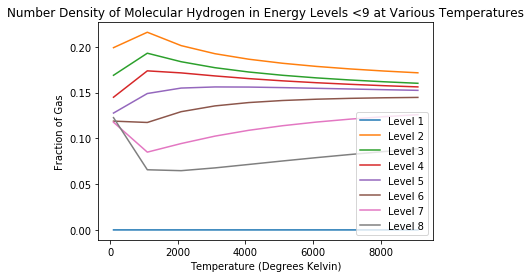

In [16]:
'''
ASTP-720, Fall 2020
Homework 3
Zach Diermyer
Problem 2
'''

import numpy as np
import matplotlib.pyplot as plt
%run coefficients_reader.py

class matrix:
    def __init__(self, data):
        #Creates Matrix object with 2D data array
        self.data = data
    
    def transpose(self):
        '''
        Takes the transpose of a matrix
        Inputs:
            self - The matrix to find the transpose of
        Returns:
            newmat - Transposed matrix
        '''
        newmat = []
        for i in range(0, len(self.data[0])):
            newmat.append([])
        for i in range(0, len(self.data)):
            for j in range(0, len(self.data[i])):
                newmat[j].append(self.data[i][j])
        return(newmat)
    
    def LUdecomp(self):
        '''
        Performs an LU decomposition of ay size square matrix
        Inputs:
            self - The matrix to perform the decomposition on
        Returns:
            lower - The lower triangular matrix decomposition
            upper - The upper triangular matrix decomposition
        '''
        lower = []                         #Initialize lower triangular matrix
        for i in range(0, len(self.data)):
            newrow = []
            for j in range(0, len(self.data)):
                newrow.append(0)
            lower.append(newrow)
        upper = []                         #Initialize upper triangular matrix
        for i in range(0, len(self.data)):
            newrow = []
            for j in range(0, len(self.data)):
                newrow.append(0)
            upper.append(newrow)
        for i in range(0, len(self.data)): 
            for k in range(i, len(self.data)):
                tot = 0
                for j in range(i): 
                    tot += (lower[i][j] * upper[j][k])
                upper[i][k] = self.data[i][k] - tot
            for k in range(i, len(self.data)):
                if i == k: 
                    lower[i][i] = 1 # Diagonal values are 1 
                else: 
                    tot = 0 
                    for j in range(i): 
                        tot += (lower[k][j] * upper[j][i])
                    lower[k][i] = int((self.data[k][i] - tot)/upper[i][i])
        return(lower, upper)    

def construct_AulBul_matrices(h, c, nu):
    '''
    This function uses the coefficients_reader.py file to construct a matrix of 
    A_ul coefficients and B_ul coefficients simultaneously
    Inputs:
        h - Planck's constant
        c - Speed of light
        nu - Array of emission wavelengths
    Returns:
        Aul - A_ul Spontaneous emission coefficient matrix
        Bul - B_ul Stimulated emission coefficient matrix
    '''
    Aul = []
    Bul = []
    for i in range(0, 9):
        Aul.append([])
        Bul.append([])
        for j in range(0, 9):  #start columns at the 2nd index to eliminate zero cloumn
            if i >= j:
                Aul[i].append(0)   #no emission if j/starting energy level is lower than ending level
                Bul[i].append(0)
            else:
                Bcoeff = (c**2)/(2*h*(nu[i][j]**3))
                Aul[i].append(Adict[(i+1, j+1)].value)
                Bul[i].append(Bcoeff*Adict[(i+1, j+1)].value)
    return(Aul, Bul)

def construct_Blu_matrix(Bul):
    '''
    Uses the B_ul matrix from contstruct_AulBul_matrices() to convert each B_ul value
    to a B_lu, construct a matrix of the values, and transposes the matrix
    Inputs:
        Bul - Stimulated emission coefficient matrix
    Returns:
        Blu - Stimulated absorption coefficient matrix
    '''
    Blu0 = Bul
    for i in range(0, len(Bul)):
        for j in range(0, len(Bul[i])):
            Blu0[i][j] = ((2*(i+1)**2)/(2*(j+1)**2))*Blu0[i][j]
    Blu0_matrix = matrix(Blu0)
    Blu = Blu0_matrix.transpose()
    return(Blu)

def coefficient_matrix(Blu, Aul, Bul, temp, h, nu, c, boltz):
    '''
    Uses the Blu, Aul, and Bul Einstien coefficient matrices to construct the total
    coefficient matrix of energy level transitions
    Inputs:
        Blu - Stimulated absorption coefficient matrix
        Bul - Stimulated emission coefficient matrix
        Aul - Spontaneous emission coefficient matrix
        temp - Gas temperature
        h - Planck's constant
        nu - 2D array of hydrogen emission wavelengths
        c - Speed of light
        boltz - Boltzmanns constant
    Returns:
        coeff_matrix - Number density energy level transition coefficient matrix
    '''
    coeff_matrix = []
    for i in range(0, len(Blu)):
        coeff_matrix.append([])
        for k in range(0, len(Blu[0])):
            if i > k:
                j_coeff = (2*h*(nu[k][i]**3))/(c**2)      #swap row and column index of frequency
                j_exp = (h*(nu[k][i]))/(boltz*temp)       #because frequency matrix is upper diagonal
                j = j_coeff*(1/(np.exp(j_exp) - 1))
                coeff_matrix[i].append(-Blu[i][k]*j)      #lower half of matrix is just absorption
            elif i == k:
                tot = 0                            #sum all emission and absorption in column
                for l in range(len(Blu)):          #to get diagonal values
                    if l > k:
                        j_coeff = (2*h*(nu[k][l]**3))/(c**2)
                        j_exp = (h*(nu[k][l]))/(boltz*temp)
                        j = j_coeff*(1/(np.exp(j_exp) - 1))
                        tot += Blu[l][k]*j
                    elif k > l:
                        j_coeff = (2*h*(nu[l][k]**3))/(c**2)
                        j_exp = (h*(nu[l][k]))/(boltz*temp)
                        j = j_coeff*(1/(np.exp(j_exp) - 1))
                        tot += Aul[l][k]
                        tot += Bul[l][k]*j
                coeff_matrix[i].append(tot)
            else:                                   #upper half of matrix is emission coefficients
                j_coeff = (2*h*(nu[i][k]**3))/(c**2)
                j_exp = (h*(nu[i][k]))/(boltz*temp)
                j = j_coeff*(1/(np.exp(j_exp) - 1))
                coeff_matrix[i].append(-(Aul[i][k] + Bul[i][k]*j))
    return(coeff_matrix)

def lower_solver(lower, B):
    '''
    Solves the Ly = B equation for the lower triangular matrix of A in the equation
    Ax = B
    Inputs:
        lower - Lower triangular matrix from LU decomposition of A
        B - Right hand side of original equation, Ax = B
    Returns:
        y - Vector solution of Ly = B to be used in upper triangular matrix solution
    '''
    y0 = B[0]/lower[0][0]
    y = [y0]
    n = 1
    while n < len(lower):
        for i in range(0, n):
            numer = B[n]
            numer -= y[i]*lower[n][i]
        yn = numer/lower[n][n]
        n += 1
        y.append(yn)
    return(y)

def upper_solver(upper, y):
    '''
    Solves the Uy = x equation for the upper triangular matrix of A in the equation
    Ax = B
    Inputs:
        upper - upper triangular matrix from LU decomposition of A
        y - Vector solution of Ly = B
    Returns:
        x - Vector solution to original equation, Ax = B
    '''
    x0 = y[-1]/upper[-1][-1]
    x = [x0]
    n = -2
    while n > -len(upper):
        for i in range(-1, n, -1):
            numer = y[n]
            numer -= y[i]*upper[n][i]
        xn = numer/upper[n][n]
        n -= 1
        x.append(xn)
    return(x)
            
def main():
    h = 6.6261*10e-27     #in cgs units
    c = 3e10           #in cgs units
    k = 1.3807*10e-16     #in cgs units
    Etot = -13.6          #in eV
    hc = 1240          #eV * nm
    nu = []
    for i in range(0,9):       #create matrix of radiation frequencies
        nu.append([])          #for each transition level
        for j in range(0,9):
            if i >= j:
                nu[i].append(0)
            else:
                dE = Etot*((1/((j+1)**2))-(1/((i+1)**2)))
                wlength = hc/dE
                nu[i].append(c/(wlength*10e-7))
    AulBul = construct_AulBul_matrices(h, c, nu)
    Blu = construct_Blu_matrix(AulBul[1])
    n = []
    temprange = []
    B = []    #make right side of Ax=B equation very small numbers instead of 0
    while len(B) < len(Blu):
        B.append(10e-6)
    for T in range(100, 10100, 1000):
        coeff = coefficient_matrix(Blu, Aul = AulBul[0], Bul = AulBul[1], temp = T, h = h, nu = nu, c = c, boltz = k)
        coeff_matrix = matrix(coeff)
        coeffLU = coeff_matrix.LUdecomp()
        lower = coeffLU[0]
        upper = coeffLU[1]
        y = lower_solver(lower, B)
        x = upper_solver(upper, y)
        n.append(x)
        temprange.append(T)
    ni = [[], [], [], [], [], [], [], []]      #group number densities 
    labels = []
    for i in range(len(n)):
        labels.append('Level ' + str(i+1))
        for j in range(len(n[0])):
            ni[j].append(n[i][j]/np.sum(n[i]))
    print(ni)
    for i in range(len(ni)):
        plt.plot(temprange, ni[i])
    plt.legend(labels = labels)
    plt.xlabel('Temperature (Degrees Kelvin)')
    plt.ylabel('Fraction of Gas')
    plt.title('Number Density of Molecular Hydrogen in Energy Levels <9 at Various Temperatures')
main()